In [8]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import ttest_ind

T-statistic: 1.520
P-value: 0.129


/tmp/ipykernel_17890/2820237147.py:26: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  axs.plot(time[:len(equity_train)], equity_train, color='b',
/usr/lib/python3/dist-packages/matplotlib/cbook/__init__.py:1402: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  ndim = x[:, None].ndim
/usr/lib/python3/dist-packages/matplotlib/axes/_base.py:276: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x = x[:, np.newaxis]
/tmp/ipykernel_17890/2820237147.py:28: FutureWarning: The 

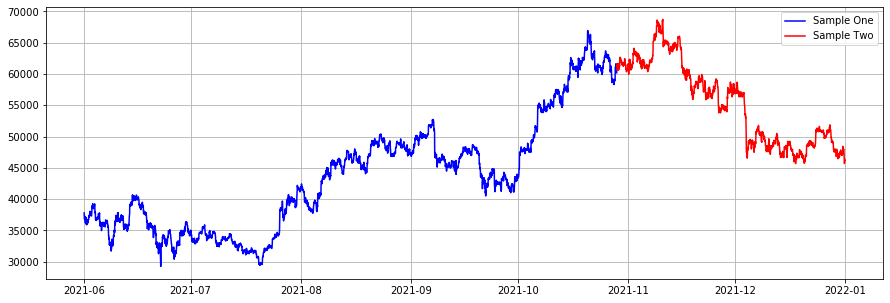

In [10]:
train_test_split = 0.7

df = pd.read_csv('./data/Binance_Futures/BTCBUSD/1h.csv')
df['close time'] = pd.to_datetime(df['close time'], unit='ms')
df = df[df['close time'] >= '2021-06-01']
df = df[df['close time'] <= '2022-01-01']
time = df['close time']

train_idx = round(len(df) * train_test_split)
equity_train = df['close'].iloc[:train_idx].to_numpy()
equity_test = df['close'].iloc[train_idx:].to_numpy()

# compute returns
returns_train = np.diff(equity_train)/equity_train[:-1]
returns_test = np.diff(equity_test)/equity_test[:-1]

# Assuming returns_train and returns_test are already defined
t_stat, p_value = ttest_ind(returns_train, returns_test, equal_var=False)

print("T-statistic: {:.3f}".format(t_stat))
print("P-value: {:.3f}".format(p_value))


fig, axs = plt.subplots(1, 1, figsize=(15, 5))

axs.plot(time[:len(equity_train)], equity_train, color='b',
                label='Sample One')
axs.plot(time[-len(equity_test):], equity_test, color='r',
                label='Sample Two')

axs.grid(True)
axs.legend()

plt.savefig('./two_sample_t_test_plot.png', dpi=300)